## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import r2_score

In [2]:
plt.style.use(['ggplot'])

# 12. Machine learning techniques

In [3]:
import random as rd
rd.seed(0)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 12.1 Loading and exploring the dataset

First, we use pandas to load the dataset from a csv file.

In [17]:
# use pabdas to read './titanic.csv'
# raw_data = pd.read_csv('AFLW2000_CSV_Original.csv', sep = ',')
raw_data = pd.read_csv('AFLW2000_CSV_nose_chin_Y.csv', sep = ',')
raw_data

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,1.098942,1.093623,1.046228,1.003509,0.932269,0.815172,0.676699,0.449410,0.118692,0.243987,...,0.301783,0.334626,0.354570,0.432050,0.523408,0.520601,0.458871,-0.399231,0.018227,0.085676
1,1.146196,1.099199,1.069516,1.004987,0.863524,0.660770,0.429729,0.237401,0.252338,0.482577,...,0.491041,0.462480,0.454482,0.493055,0.447541,0.460963,0.481309,0.470065,1.189533,0.300959
2,0.516446,0.552702,0.596111,0.614219,0.599485,0.544578,0.467171,0.423267,0.541166,0.809489,...,0.377620,0.374466,0.365047,0.343690,0.382258,0.397722,0.397069,-0.184650,0.881137,-0.236852
3,0.617134,0.494862,0.331161,0.195162,0.061588,0.074565,0.183670,0.347858,0.651314,0.948570,...,0.411311,0.376304,0.343827,0.216196,0.412265,0.462268,0.479282,-0.175379,0.299208,-0.373374
4,1.438307,1.529986,1.619708,1.668967,1.643812,1.530264,1.319438,1.090354,1.029818,1.178302,...,0.329612,0.332356,0.309886,0.371795,0.393731,0.412125,0.400477,-0.882169,1.198004,-1.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.273663,1.260673,1.201879,1.136581,1.047372,0.912882,0.740402,0.507200,0.183972,0.136487,...,0.403298,0.410273,0.427034,0.446217,0.484604,0.483347,0.457206,-0.197102,-0.070430,0.105118
1996,1.636016,1.610211,1.593053,1.539618,1.401432,1.153100,0.855988,0.604646,0.484501,0.538519,...,0.409411,0.400008,0.393672,0.409560,0.409885,0.419485,0.421996,-0.232617,-1.418751,0.175960
1997,1.256878,1.273227,1.288105,1.278910,1.212399,1.062473,0.870527,0.678383,0.591509,0.671871,...,0.354212,0.359044,0.362745,0.410615,0.389214,0.392860,0.376122,-1.447955,1.431267,-1.509418
1998,1.620198,1.624991,1.613607,1.598031,1.531942,1.347036,1.106420,0.852163,0.679503,0.668389,...,0.401851,0.409263,0.409986,0.434296,0.437353,0.440258,0.428200,-0.420465,-1.191176,0.451515


## All Features

In [18]:
X = raw_data.iloc[:,0:136].to_numpy()

## 6 * 2 (12) Selected Features

In [19]:
y_shift = 68
xy_list = ["8", "30", "36", "45", "48", "54", str(8 + y_shift), str(30+ y_shift), str(36+ y_shift), str(45+ y_shift), str(48+ y_shift), str(54+ y_shift)]

In [20]:
X = raw_data[xy_list]
X

,8,30,36,45,48,54,76,98,104,113,116,122
0,0.118692,0.0,0.665509,0.817264,0.474634,0.390983,1.0,0.0,0.874677,0.739283,0.248823,0.434979
1,0.252338,0.0,0.403196,0.843711,0.247529,0.489991,1.0,0.0,0.276896,0.459228,0.596279,0.496673
2,0.541166,0.0,0.033345,0.754304,0.211529,0.727214,1.0,0.0,0.442517,0.546255,0.399115,0.349114
3,0.651314,0.0,0.637943,0.654190,0.046217,0.671781,1.0,0.0,0.491591,0.945473,0.418935,0.206750
4,1.029818,0.0,0.361079,0.579493,0.673239,0.756450,1.0,0.0,0.523070,0.744599,0.400893,0.380871
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.183972,0.0,0.728549,0.717309,0.484336,0.217477,1.0,0.0,0.779885,0.654895,0.382235,0.450816
1996,0.484501,0.0,0.651693,0.479454,0.465217,0.408402,1.0,0.0,0.448384,0.511403,0.463824,0.411434
1997,0.591509,0.0,0.366108,0.383186,0.481978,0.410237,1.0,0.0,0.421619,0.467517,0.367382,0.419317
1998,0.679503,0.0,0.673259,0.316656,0.697352,0.443617,1.0,0.0,0.517083,0.460675,0.408244,0.441835


In [21]:
#pitch, yaw, roll
p = raw_data[["136"]].to_numpy()
y = raw_data[["137"]].to_numpy()
r = raw_data[["138"]].to_numpy()

Next, we can explore the dataset.

In [22]:
X.shape

(2000, 12)

In [23]:
X.shape[0]

2000

In [24]:
X.shape[1]

12

In [25]:
# Use pandas to examine some info of the dataset
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 139 entries, 0 to 138
dtypes: float64(139)
memory usage: 2.1 MB


In [26]:
# Use pandas to examine the description of the dataset
raw_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.066311,1.039954,0.998849,0.953668,0.875176,0.742672,0.587225,0.426198,0.333187,0.451635,...,0.377142,0.374051,0.373615,0.395653,0.452195,0.462530,0.452389,-0.107145,0.014077,-0.034479
std,0.581431,0.565682,0.561837,0.556414,0.538078,0.491387,0.430295,0.385857,0.376440,0.374651,...,0.068567,0.049530,0.061705,0.128611,0.063375,0.056206,0.071464,0.628119,0.654185,0.716014
min,0.001328,0.000473,0.000684,0.002147,0.000221,0.000913,0.000022,0.000151,0.000048,0.001351,...,0.027472,0.182508,0.042651,0.002341,0.064799,0.128745,0.058961,-12.457202,-6.130066,-16.969362
25%,0.678575,0.656682,0.611286,0.570442,0.507081,0.413572,0.307153,0.194415,0.104638,0.219973,...,0.344474,0.347324,0.341744,0.332334,0.415918,0.427077,0.416268,-0.258503,-0.294246,-0.174806
50%,1.056427,1.029161,0.982744,0.927673,0.843076,0.702456,0.539055,0.361993,0.254147,0.382645,...,0.380019,0.377493,0.380346,0.401433,0.449482,0.459751,0.449030,-0.122268,0.019702,-0.018098
75%,1.451478,1.417511,1.371153,1.318242,1.197966,1.010257,0.800802,0.571572,0.448982,0.592381,...,0.414338,0.406889,0.411642,0.456467,0.485437,0.494232,0.483207,0.040192,0.334715,0.134378
max,12.103001,9.927781,8.143620,8.901703,9.439138,9.236911,8.456390,7.461250,6.437375,5.600299,...,1.570098,0.647783,0.837776,2.230355,1.059148,0.815018,1.812268,15.598820,3.277500,5.829394


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplo

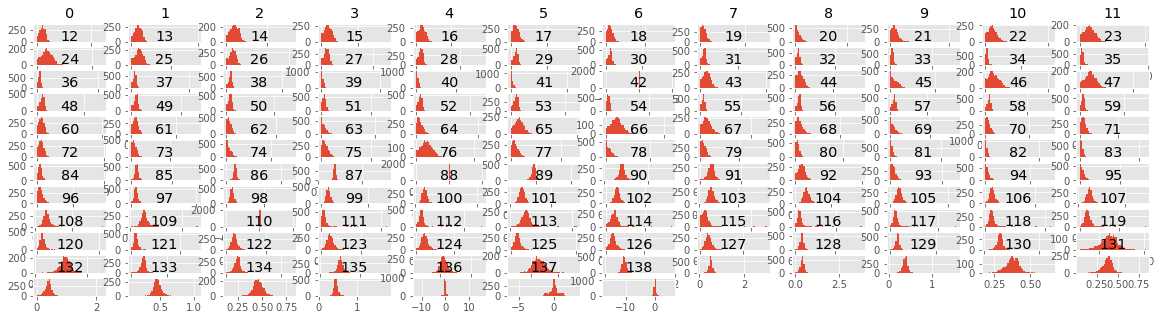

In [27]:
# Use pandas to examine the histograms of the dataset columns
raw_data.hist(bins = 50, figsize = (20, 5))

In [16]:
# use pandas to check missing data (NA(not available) values) for all the columns
raw_data.isna().sum()


0      0
1      0
2      0
3      0
4      0
      ..
134    0
135    0
136    0
137    0
138    0
Length: 139, dtype: int64

The Cabin column is missing too many values to be useful. Let's drop it altogether.

In [ ]:
# Use pandas to drop "Cabin" column
clean_data = raw_data.drop(columns = "Cabin", axis = 1) # axis = 1 -> column, axis = 0 -> row

In [ ]:
clean_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Other columns such as Age or Embarked are missing some values, but they can still be useful.

For the age column, let's fill in the missing values with the median of all ages.

For the Embarked column, let's make a new category called 'U', for Unknown port of embarkment.

In [17]:
raw_data.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
134    0
135    0
136    0
137    0
138    0
Length: 139, dtype: int64

### 12.2.3 Saving our data for the future

In [ ]:
# save the clean dataset to './clean_titanic_data.csv'
clean_data.to_csv('./clean_titanic_data.csv', index = None)

### 12.3.4 Feature selection

#### 6 * 2 (12) Selected Features

In [16]:
# preprocessed_data.head()

In [28]:
y_shift = 68
xy_list = ["8", "30", "36", "45", "48", "54", str(8 + y_shift), str(30+ y_shift), str(36+ y_shift), str(45+ y_shift), str(48+ y_shift), str(54+ y_shift)]

In [29]:
X = raw_data[xy_list]
X

,8,30,36,45,48,54,76,98,104,113,116,122
0,0.118692,0.0,0.665509,0.817264,0.474634,0.390983,1.0,0.0,0.874677,0.739283,0.248823,0.434979
1,0.252338,0.0,0.403196,0.843711,0.247529,0.489991,1.0,0.0,0.276896,0.459228,0.596279,0.496673
2,0.541166,0.0,0.033345,0.754304,0.211529,0.727214,1.0,0.0,0.442517,0.546255,0.399115,0.349114
3,0.651314,0.0,0.637943,0.654190,0.046217,0.671781,1.0,0.0,0.491591,0.945473,0.418935,0.206750
4,1.029818,0.0,0.361079,0.579493,0.673239,0.756450,1.0,0.0,0.523070,0.744599,0.400893,0.380871
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.183972,0.0,0.728549,0.717309,0.484336,0.217477,1.0,0.0,0.779885,0.654895,0.382235,0.450816
1996,0.484501,0.0,0.651693,0.479454,0.465217,0.408402,1.0,0.0,0.448384,0.511403,0.463824,0.411434
1997,0.591509,0.0,0.366108,0.383186,0.481978,0.410237,1.0,0.0,0.421619,0.467517,0.367382,0.419317
1998,0.679503,0.0,0.673259,0.316656,0.697352,0.443617,1.0,0.0,0.517083,0.460675,0.408244,0.441835


Next, we can explore the dataset.

In [30]:
X.shape

(2000, 12)

In [31]:
X.shape[0]

2000

In [32]:
X.shape[1]

12

### 12.3.5 Saving for future use

In [22]:
#preprocessed_data.to_csv('./preprocessed_titanic_data.csv', index=None)

# 12.4 Training models

In [7]:
data = pd.read_csv('./preprocessed_titanic_data.csv')
data.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_C,Pclass_Q,Pclass_S,Pclass_U,...,"Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]",Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,1,1,0,71.2833,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1,1,0,53.1000,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


### 12.4.1 Features-labels split and train-validation split

In [49]:
# features = raw_data[xy_list]
features = raw_data.iloc[:,0:136].to_numpy()

In [82]:
#pitch, yaw, roll
# p = data[["136"]].to_numpy()
labels = raw_data[["138"]].to_numpy()
# y = raw_data[["137"]].to_numpy()
# r = raw_data[["138"]].to_numpy()

In [83]:
# # drop ["Survived"] column and save that to features
# features = data.drop(["Survived"], axis = 1)
#
# # save the ["Survived"] column to labels
# labels = data["Survived"]

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
# split data by 60% train ; use random_state=100
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(features, labels, test_size = 0.4, random_state=100)

In [86]:
# split test data by 50% validation and 50% test ; use random_state=100
features_validation, features_test, labels_validation, labels_test = train_test_split(features_validation_test, labels_validation_test, test_size = 0.5, random_state=100)

In [87]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

1200
400
400
1200
400
400


### 12.4.2 Training different models on our dataset

We'll train six models:
- Linear Regression
- Decision tree Regressor
- Support vector Regression (SVR)
- RandomForestRegressor
- GradientBoostingRegressor
- AdaBoostRegressor

In [88]:
# Train linear regression model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression().fit(features_train, labels_train)

In [89]:
# Train decision tree model ; don't use any hyperparameter
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor().fit(features_train, labels_train)

In [90]:
# Train SVM model ; don't use any hyperparameter
from sklearn.svm import SVR

svm_model = SVR().fit(features_train, labels_train)

D:\Applications\Anaconda\Installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [91]:
# Train random forest model ; don't use any hyperparameter
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor().fit(features_train, labels_train)

C:\Users\ABDELR~1\AppData\Local\Temp/ipykernel_18636/198170182.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestRegressor().fit(features_train, labels_train)


In [92]:
# Train gradient boosting model ; don't use any hyperparameter
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor().fit(features_train, labels_train)

D:\Applications\Anaconda\Installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [93]:
# Train Adaboost model ; don't use any hyperparameter
from sklearn.ensemble import AdaBoostRegressor

ab_model = AdaBoostRegressor().fit(features_train, labels_train)

D:\Applications\Anaconda\Installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [94]:
# Train Adaboost model ; don't use any hyperparameter
from sklearn.multioutput import MultiOutputRegressor
labels_train = raw_data.iloc[0:1200,136:140].to_numpy()
# ab_model = AdaBoostRegressor().fit(features_train, labels_train)
mor_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(features_train, labels_train)
    # .predict(features_validation)

### 12.4.3 Evaluating the models

#### Accuracy

In [95]:
# print accuracy of each model on validation data
print("Scores of the models")
print("Linear regression:", lr_model.score(features_validation,labels_validation))
print("Decision tree:", dt_model.score(features_validation,labels_validation))
print("SVR:", svm_model.score(features_validation,labels_validation))
print("Random forest:", rf_model.score(features_validation,labels_validation))
print("Gradient boosting:", gb_model.score(features_validation,labels_validation))
print("AdaBoost:", ab_model.score(features_validation,labels_validation))

Scores of the models
Linear regression: 0.0617660764022645
Decision tree: -0.025206475263100936
SVR: 0.07788611316055238
Random forest: 0.25548367658310744
Gradient boosting: 0.12482800961010898
AdaBoost: 0.08077643691536274


In [96]:
print("MultiOutputRegressor:", mor_model.score(features_validation,labels_validation))

ValueError: y_true and y_pred have different number of output (1!=3)

#### R2-score

In [98]:
# print F1-score of each model on validation data
from sklearn.metrics import r2_score

print("R2-scores of the models:")
labels_predict = lr_model.predict(features_validation)
print("Linear regression:", r2_score(labels_validation, labels_predict))
labels_predict = dt_model.predict(features_validation)
print("Decision tree:", r2_score(labels_validation, labels_predict))
labels_predict = svm_model.predict(features_validation)
print("SVR:", r2_score(labels_validation, labels_predict))
labels_predict = rf_model.predict(features_validation)
print("Random forest:", r2_score(labels_validation, labels_predict))
labels_predict = gb_model.predict(features_validation)
print("Gradient boosting:", r2_score(labels_validation, labels_predict))
labels_predict = ab_model.predict(features_validation)
print("AdaBoost:", r2_score(labels_validation, labels_predict))

R2-scores of the models:
Linear regression: 0.0617660764022645
Decision tree: -0.025206475263100936
SVR: 0.07788611316055238
Random forest: 0.25548367658310744
Gradient boosting: 0.12482800961010898
AdaBoost: 0.08077643691536274


### R2-score

In [399]:
# r2score = r2_score(labels_validation, labels_predict, sample_weight=None, multioutput='uniform_average')
# r2score

### 12.4.4 Testing the model

Finding the accuracy and the F1-score of the model in the testing set.

In [99]:
# print accuracy of gradient boost model on testing data
print("Scores of the models")
print("Linear regression:", lr_model.score(features_test,labels_test))
print("Decision tree:", dt_model.score(features_test,labels_test))
print("SVR:", svm_model.score(features_test,labels_test))
print("Random forest:", rf_model.score(features_test,labels_test))
print("Gradient boosting:", gb_model.score(features_test,labels_test))
print("AdaBoost:", ab_model.score(features_test,labels_test))


Scores of the models
Linear regression: -0.4541835484160097
Decision tree: 0.010498765802375187
SVR: 0.42554379193452607
Random forest: 0.21383087977094772
Gradient boosting: 0.3541674323078059
AdaBoost: 0.16695648805078556


In [37]:
print("MultiOutputRegressor:", mor_model.score(features_test,labels_test))

ValueError: y_true and y_pred have different number of output (1!=3)

In [38]:
# print F1-score of gradient boost model on testing data
print("F1-scores of the models:")
labels_predict = lr_model.predict(features_test)
print("Linear regression:", f1_score(labels_test, labels_predict))
labels_predict = dt_model.predict(features_test)
print("Decision tree:", f1_score(labels_test, labels_predict))
labels_predict = svm_model.predict(features_test)
print("SVM:", f1_score(labels_test, labels_predict))
labels_predict = rf_model.predict(features_test)
print("Random forest:", f1_score(labels_test, labels_predict))
labels_predict = gb_model.predict(features_test)
print("Gradient boosting:", f1_score(labels_test, labels_predict))
labels_predict = ab_model.predict(features_test)
print("AdaBoost:", f1_score(labels_test, labels_predict))

F1-scores of the models:


NameError: name 'f1_score' is not defined

# 12.5 Grid search

In [291]:
from sklearn.model_selection import GridSearchCV
# CV -> Cross validation

In [331]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.01, 0.1, 1 , 10, 50 ,100],
                  'gamma': [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.01, 0.1, 1 , 10, 50 ,100]
                }
# use gridsearch to find the best hyperparameters 
svm = SVR()
svm_gs = GridSearchCV(estimator = svm, param_grid = svm_parameters)

svm_gs.fit(features_train, np.ravel(labels_train))
# git the best model 
svm_winner = svm_gs.best_estimator_
svm_winner

svm_winner.score(features_validation, labels_validation)

0.6189654392139047

In [332]:
svm_winner

SVR(C=50, gamma=1e-05)

# 12.6 Cross validation

In [333]:
# print the k-fold cross validation output
svm_gs.cv_results_

{'mean_fit_time': array([0.05192423, 0.05552797, 0.11294394, 0.07624984, 0.05362787,
        0.08500457, 0.0918818 , 0.0911211 , 0.08886089, 0.08854189,
        0.08902335, 0.04861059, 0.05252037, 0.05182009, 0.0736475 ,
        0.05201273, 0.06732144, 0.06741934, 0.06679621, 0.06701655,
        0.06491923, 0.06758389, 0.03951039, 0.04225998, 0.03755021,
        0.05570354, 0.04211044, 0.0611618 , 0.06484876, 0.06654816,
        0.06730332, 0.06630135, 0.06471848, 0.02440987, 0.0392086 ,
        0.03519092, 0.05503874, 0.04131393, 0.06261997, 0.06801348,
        0.06543641, 0.06375866, 0.06716695, 0.06832628, 0.03400517,
        0.04132209, 0.03760705, 0.05652719, 0.04341707, 0.06544628,
        0.06783042, 0.06571741, 0.06956148, 0.06748595, 0.06640873,
        0.02344017, 0.04020495, 0.03260674, 0.05327444, 0.04320707,
        0.06161575, 0.0688148 , 0.06702003, 0.06822028, 0.06731205,
        0.06851916, 0.01040206, 0.03960915, 0.02340899, 0.05761561,
        0.04301786, 0.06351471,

# 12.7 Save the model

In [ ]:
# use joblib to save the model
import joblib

joblib.dump(svm_winner, "svm_model.pkl")

# Later 
# my_model_loaded = joblib.load("svm_model.pkl")

['svm_model.pkl']

In [402]:
# use joblib to save the model
import joblib

# joblib.dump(gb_model, "gb_model.pkl")

# joblib.dump(svm_model, "svm_model_p.pkl")
joblib.dump(dt_model, "dt_model_p.pkl")


# Later
# my_model_loaded = joblib.load("svm_model.pkl")

['dt_model_p.pkl']